## BMI Workflow

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
# define state
class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # Body Mass Index    
    label: str     # BMI category label

In [8]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state.get("weight")
    height = state.get("height")

    bmi = weight / (height ** 2)
    state["bmi"] = round(bmi, 2)

    return state

In [9]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state.get("bmi")

    if bmi < 18.5:
        label = "Underweight"
    elif 18.5 <= bmi < 24.9:
        label = "Normal weight"
    elif 25 <= bmi < 29.9:
        label = "Overweight"
    else:
        label = "Obesity"

    state["label"] = label
    return state

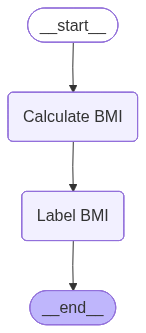

In [10]:
# define your graph 
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node("Calculate BMI", calculate_bmi)

graph.add_node("Label BMI", label_bmi)

# add edges to your graph
graph.add_edge(START, "Calculate BMI")
graph.add_edge("Calculate BMI", "Label BMI")
graph.add_edge("Label BMI", END)

# compile your graph
workflow = graph.compile()

workflow

In [11]:
#execute your graph
initial_state = {"height": 1.75, "weight": 70}

final_state = workflow.invoke(initial_state)
print(final_state)

{'height': 1.75, 'weight': 70, 'bmi': 22.86, 'label': 'Normal weight'}
